In [1]:
%matplotlib inline

In [2]:
from vizztf import ZTFSNViz

In [3]:
from sqlalchemy import create_engine

In [11]:
import pandas as pd
import numpy as np

In [12]:
# Read cadences:
def read_cadence(fname):
    engine = create_engine('sqlite:////Users/rbiswas/Downloads/test_schedule_v3.db')
    df = pd.read_sql_table('Summary', con=engine)
    df.obsHistID = df.obsHistID.astype(np.int)
    df.set_index('obsHistID', inplace=True)
    df.expMJD = df.expMJD + 365 * 2 # ZTF is not done
    return df

In [13]:
df = read_cadence(1)

In [16]:
ztfsky = ZTFSNViz(showVisibleFields=True, 
                  data_dir='/Users/rbiswas/doc/projects/ZTF/data_year/')

In [35]:
def get_coords(obsHistID, df):
    ra, dec, mjd, band = df.loc[obsHistID, ['fieldRA', 'fieldDec', 'expMJD', 'filter']]
    ra, dec = np.degrees([ra, dec])
    return ra, dec, mjd, band


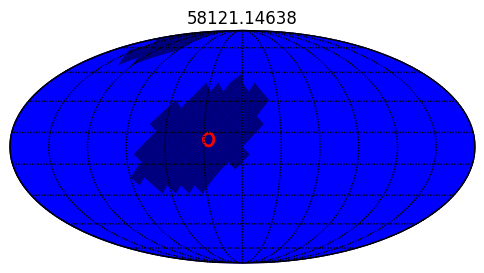

In [36]:
ra, dec, mjd, band = get_coords(1, df)
fig, ax = ztfsky.generate_image(ra, dec, 4., mjd, band=band)

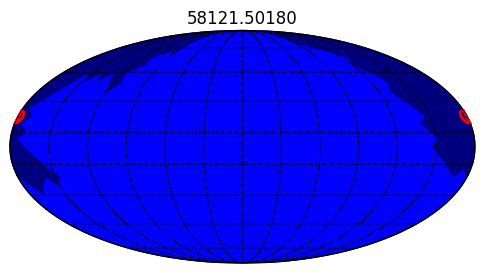

In [37]:
ra, dec, mjd, band = get_coords(682, df)
fig, ax = ztfsky.generate_image(ra, dec, 4., mjd, band=band)